## [Nelson rules](https://en.m.wikipedia.org/wiki/Nelson_rules) describe probable behaviors in time series data 



In [87]:
%pylab inline
matplotlib.style.use('ggplot')
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [137]:
# Nelson's rules

def nelson1(arr):
    """
        Input: 
          arr: array of numbers

        Description: One point is more than 3 standard deviations from the mean.
        Problem: One sample (two shown in this case) is grossly out of control.
        Solves: identifying outliers?
    """
    stddev = np.std(arr)
    mn = np.mean(arr)
    tf = (np.abs((arr - mn)) > 3.0*stddev).any()

    return tf

def nelson2(arr):
    """
        Input:
          arr: array of numbers

        Description: Nine (or more) points in a row are on the same side of the mean.
        Problem: Some prolonged bias exists.
    """
    parr = pd.Series(arr)
    mn = parr.mean()
    rollmn = pd.rolling_mean((parr > mn),9)
    # If nine points in a row are above or below the mean, return trues
    tf1 = ( rollmn > 0.999 ).any()
    tf2 = ( rollmn < 0.001 ).any()
    
    return tf1 or tf2

def nelson3(arr):
    """
        Input:
          arr: array of numbers
        Description: Six (or more) points in a row are continually increasing (or decreasing).
        Problem: A trend exists.
    """
    parr = pd.Series(arr)
    tf_incr = pd.rolling_mean(parr[:-1] < parr[1:],7).any()
    tf_decr = pd.rolling_mean(parr[:-1] > parr[1:],7).any()
    
    return tf_incr or tf_decr

def nelson4(arr):
    """
        Input:
          arr: array of numbers
        Description: Fourteen (or more) points in a row alternate in direction, increasing then decreasing.
        Problem: This much oscillation is beyond noise. Note that the rule is concerned with directionality only. The position of the mean and the size of the standard deviation have no bearing.
    """
    
    return tf

True

In [20]:
import numpy.random as nprnd
arr = randint(1000, size=10000)
stddev = np.std(arr)
mn = np.mean(arr)
maxval = np.max(arr)
minval = np.min(arr)
print(stddev,mn,maxval,minval)
tf = (np.abs((arr - mn)) > (3.0 * stddev)).any()
print(tf)

287.783604737 498.9559 999 0
False


In [132]:
print("n1:",nelson1(arr))
print("n2:",nelson2(arr))
print("n3:",nelson3(arr))

n1: False


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [84]:
parr = pd.Series(arr[1155:1185])
(pd.rolling_mean((parr > parr.mean()),9) > 0.999).any()

True

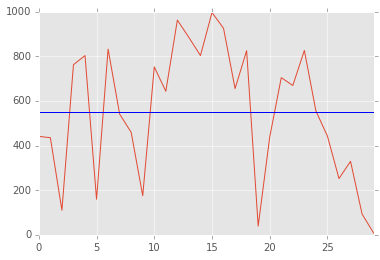

In [103]:
a = parr.plot()
a.axhline(parr.mean(), linestyle='-')

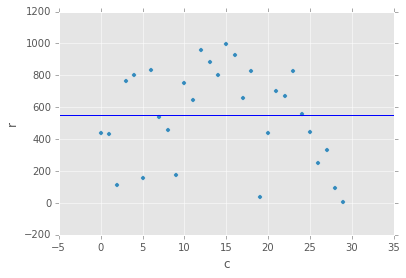

In [112]:
df = pd.concat([parr,pd.Series(np.arange(len(parr)))],axis=1)
df.columns = ['r','c']
a = df.plot(kind='scatter',x='c',y='r')
a.axhline(df.r.mean(),linestyle='-')

In [123]:
pd.rolling_mean(arr[:2:] < arr[2:2],7).any()

True

In [128]:
arr[]

array([745, 484, 809, ..., 129, 179, 439])